### Normal equation

In [2]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import Dict, Iterator, List, Tuple, Union


In [4]:
# Generating the data

X = 2 * np.random.rand(100, 1)
#a , theta_0 = 3, 4
y =  4 + 3 * X + np.random.randn(100, 1)
X.shape, y.shape

((100, 1), (100, 1))

In [18]:
def plot_two_dict(array_1  : Dict[str, np.ndarray], array_2: Dict[str, np.ndarray])-> None:
    plt.scatter(array_1['values'], array_2['values'])
    plt.show()
    

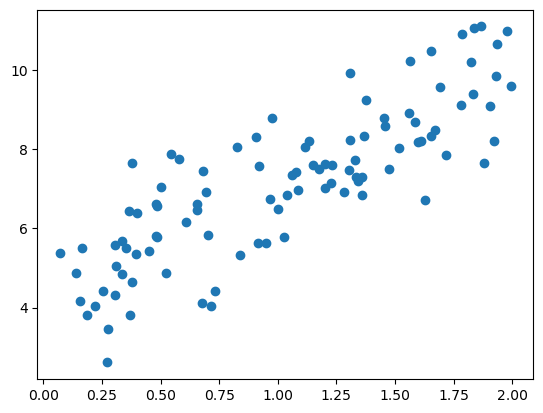

In [19]:
data = {"label":"Training Data", "values": X}
labels = {"label": "Training labels", "values": y}
plot_two_dict(data, labels)

In [20]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot((X_b))).dot(X_b.T).dot(y)
print(X.shape, X_b.shape, theta_best)

(100, 1) (100, 2) [[4.23430727]
 [2.8260045 ]]


In [22]:
theta_best.shape


(2, 1)

In [28]:
## predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.23430727],
       [9.88631627]])

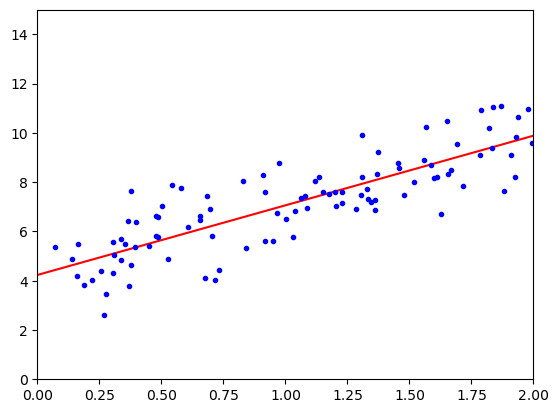

In [29]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.23430727]), array([[2.8260045]]))

In [31]:
### prediction using linear regression model
lin_reg.predict(X_new)

array([[4.23430727],
       [9.88631627]])

In [10]:
## computing the pseudo inverse of the model parameters
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [11]:
# Theta, residuals , rank and s
theta_best_svd, residuals, rank, s

(array([[3.81014793],
        [3.01778419]]),
 array([99.17786928]),
 np.int32(2),
 array([14.93052949,  3.88710436]))

In [12]:
## gradient descent
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta)- y)
    theta = theta - eta * gradients
theta

array([[3.81014793],
       [3.01778419]])